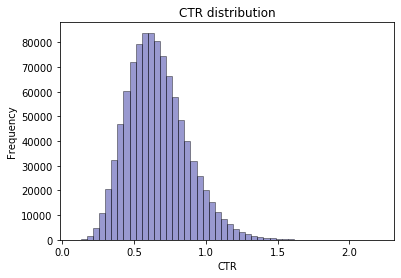

In [20]:
from scipy.stats import uniform
from scipy.stats import binom
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

trials = 100

#Change here1:
###
#display impressions/search queries
#if you use search quearies, remember to add probability of winning auction - it must redice number of queries.
#for example - from 10k to 8k when your ads is shown.
#here we take est. by Google Display Network impressions
volume = 1000000

#CTR

#NO PRIOR DATA
#Lower limit of CTR
#ctr_low = 0

#Higher limit of CTR
#ctr_high = 0.02

#uniform click distribution
#clicks_prob = uniform.rvs(ctr_low, ctr_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CTR is about 0,6%, interval is from 0.2% to 1%
clicks_prob = np.random.beta(10, 1500, size=volume)

clicks_prob_percent = clicks_prob * 100
clicks_distr = sns.distplot(clicks_prob_percent, 
                            kde = False,
                            color = 'darkblue',
                            hist_kws={'edgecolor':'black'},)
plt.title('CTR distribution')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()

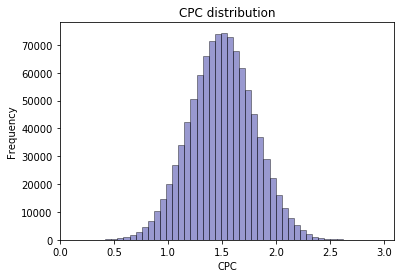

Median CPC is 1.5$


In [21]:
#dollars
cpc_low = 0.1
cpc_high = 2.5

#NO PRIOR DATA
#cpc_prob = uniform.rvs(cpc_low, cpc_high, size = volume)

#IF YOU HAVE PRIOR DATA
#in example avg CPC is about 5$, interval is from 2$ to 7$
# mean and standard deviation
mu, sigma = 1.5, 0.3
cpc_prob = np.random.normal(mu, sigma, size=volume)

cpc_distr = sns.distplot(cpc_prob, 
                          kde = False,  
                          color = 'darkblue',
                          hist_kws={'edgecolor':'black'},)
plt.title('CPC distribution')
plt.xlabel('CPC')
plt.ylabel('Frequency')
plt.show()

cpc_median = round(np.median(cpc_prob), 2)
print('Median CPC is ' + str(cpc_median) + '$')

In [22]:
#You can use this bootstrap function to calculate invervals of mean and use it for more accurate evaluation
#But it'll take time
def bootstrap(array):
    means = []
    x = 0
    for i in array:
        sample = np.random.choice(array, len(array))
        means.append(int(np.mean(sample)))
        print(x)
        x = x+1
    means = np.array(means)
    return means

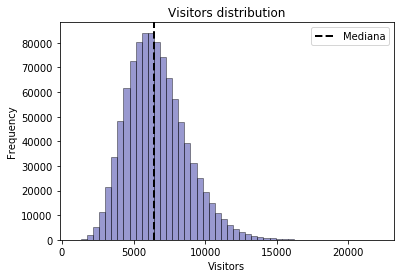

Median total costs - 9606.0$
Max total costs    - 33231.0$
Total costs inverval (95% probability) - 6476.41$ - 12735.59$


In [23]:
#Visitors
visitors = binom.rvs(volume, clicks_prob, size = volume)
#visitors = bootstrap(visitors)
visitors_distr = sns.distplot(visitors, 
                              kde = False, 
                              color = 'darkblue', 
                              hist_kws={'edgecolor':'black'})
plt.title('Visitors distribution')
plt.xlabel('Visitors')
plt.ylabel('Frequency')
plt.axvline(np.median(visitors), label = 'Mediana', color='k', linestyle='dashed', linewidth=2)
plt.legend()
#plt.text(1, 50, 'Median: {:.2f}'.format(np.median(visitors)))
plt.show()

visitors_costs = visitors * cpc_median
visitors_costs_median = round(np.median(visitors_costs), 2)
visitors_costs_max = round(np.max(visitors_costs), 2)
visitors_costs_std = round(np.std(visitors_costs), 2)
print("Median total costs - " + str(round(visitors_costs_median, 2)) + '$')
print("Max total costs " + "   - " + str(round(visitors_costs_max, 2)) + '$')
print("Total costs inverval (95% probability)" + " - " 
      + str(round(visitors_costs_median - visitors_costs_std, 2)) + '$' + ' - ' 
      + str(round(visitors_costs_median + visitors_costs_std, 2)) + '$')

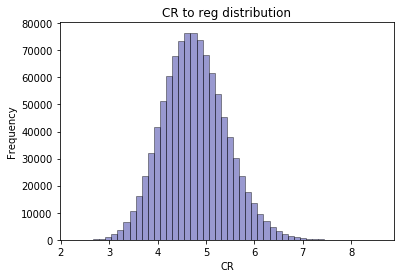

In [24]:
#Registrations
#NO PRIOR DATA
#Lower limit of CR to Reg
#cr_reg_low = 0
#Higher limit of CR to Reg
#cr_reg_high = 0.2
#CR to Registrations
#cr_reg_prob = uniform.rvs(cr_reg_low, cr_reg_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CR to Registrations is 5%, interval is from 3% to 7%
cr_reg_prob = np.random.beta(50, 1000, size=volume)

cr_reg_prob_percent = cr_reg_prob * 100
cr_reg_distr = sns.distplot(cr_reg_prob_percent,
                            kde = False, 
                            color = 'darkblue', 
                            hist_kws={'edgecolor':'black'})
plt.title('CR to reg distribution')
plt.xlabel('CR')
plt.ylabel('Frequency')
plt.show()

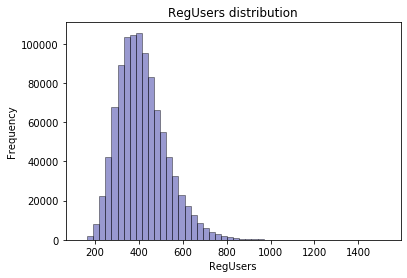

136 r_users: 0.0% (with costs interval 47.62$ - 93.64$; Medium is 70.63$)
138 r_users: 0.0% (with costs interval 46.93$ - 92.29$; Medium is 69.61$)
141 r_users: 0.0% (with costs interval 45.93$ - 90.32$; Medium is 68.13$)
142 r_users: 0.0% (with costs interval 45.61$ - 89.69$; Medium is 67.65$)
143 r_users: 0.0% (with costs interval 45.29$ - 89.06$; Medium is 67.17$)
146 r_users: 0.0% (with costs interval 44.36$ - 87.23$; Medium is 65.79$)
147 r_users: 0.0% (with costs interval 44.06$ - 86.64$; Medium is 65.35$)
148 r_users: 0.0% (with costs interval 43.76$ - 86.05$; Medium is 64.91$)
149 r_users: 0.0% (with costs interval 43.47$ - 85.47$; Medium is 64.47$)
150 r_users: 0.0% (with costs interval 43.18$ - 84.9$; Medium is 64.04$)
151 r_users: 0.0% (with costs interval 42.89$ - 84.34$; Medium is 63.62$)
152 r_users: 0.0% (with costs interval 42.61$ - 83.79$; Medium is 63.2$)
153 r_users: 0.0% (with costs interval 42.33$ - 83.24$; Medium is 62.78$)
154 r_users: 0.0% (with costs interval 4

256 r_users: 0.15% (with costs interval 25.3$ - 49.75$; Medium is 37.52$)
257 r_users: 0.14% (with costs interval 25.2$ - 49.55$; Medium is 37.38$)
258 r_users: 0.15% (with costs interval 25.1$ - 49.36$; Medium is 37.23$)
259 r_users: 0.15% (with costs interval 25.01$ - 49.17$; Medium is 37.09$)
260 r_users: 0.15% (with costs interval 24.91$ - 48.98$; Medium is 36.95$)
261 r_users: 0.16% (with costs interval 24.81$ - 48.8$; Medium is 36.8$)
262 r_users: 0.16% (with costs interval 24.72$ - 48.61$; Medium is 36.66$)
263 r_users: 0.16% (with costs interval 24.63$ - 48.42$; Medium is 36.52$)
264 r_users: 0.16% (with costs interval 24.53$ - 48.24$; Medium is 36.39$)
265 r_users: 0.16% (with costs interval 24.44$ - 48.06$; Medium is 36.25$)
266 r_users: 0.17% (with costs interval 24.35$ - 47.88$; Medium is 36.11$)
267 r_users: 0.18% (with costs interval 24.26$ - 47.7$; Medium is 35.98$)
268 r_users: 0.18% (with costs interval 24.17$ - 47.52$; Medium is 35.84$)
269 r_users: 0.18% (with costs 

372 r_users: 0.4% (with costs interval 17.41$ - 34.24$; Medium is 25.82$)
373 r_users: 0.39% (with costs interval 17.36$ - 34.14$; Medium is 25.75$)
374 r_users: 0.39% (with costs interval 17.32$ - 34.05$; Medium is 25.68$)
375 r_users: 0.38% (with costs interval 17.27$ - 33.96$; Medium is 25.62$)
376 r_users: 0.39% (with costs interval 17.22$ - 33.87$; Medium is 25.55$)
377 r_users: 0.38% (with costs interval 17.18$ - 33.78$; Medium is 25.48$)
378 r_users: 0.39% (with costs interval 17.13$ - 33.69$; Medium is 25.41$)
379 r_users: 0.39% (with costs interval 17.09$ - 33.6$; Medium is 25.35$)
380 r_users: 0.39% (with costs interval 17.04$ - 33.51$; Medium is 25.28$)
381 r_users: 0.39% (with costs interval 17.0$ - 33.43$; Medium is 25.21$)
382 r_users: 0.39% (with costs interval 16.95$ - 33.34$; Medium is 25.15$)
383 r_users: 0.38% (with costs interval 16.91$ - 33.25$; Medium is 25.08$)
384 r_users: 0.38% (with costs interval 16.87$ - 33.17$; Medium is 25.02$)
385 r_users: 0.37% (with cos

492 r_users: 0.23% (with costs interval 13.16$ - 25.89$; Medium is 19.52$)
493 r_users: 0.23% (with costs interval 13.14$ - 25.83$; Medium is 19.48$)
494 r_users: 0.22% (with costs interval 13.11$ - 25.78$; Medium is 19.45$)
495 r_users: 0.22% (with costs interval 13.08$ - 25.73$; Medium is 19.41$)
496 r_users: 0.23% (with costs interval 13.06$ - 25.68$; Medium is 19.37$)
497 r_users: 0.22% (with costs interval 13.03$ - 25.62$; Medium is 19.33$)
498 r_users: 0.23% (with costs interval 13.0$ - 25.57$; Medium is 19.29$)
499 r_users: 0.21% (with costs interval 12.98$ - 25.52$; Medium is 19.25$)
500 r_users: 0.22% (with costs interval 12.95$ - 25.47$; Medium is 19.21$)
501 r_users: 0.22% (with costs interval 12.93$ - 25.42$; Medium is 19.17$)
502 r_users: 0.21% (with costs interval 12.9$ - 25.37$; Medium is 19.14$)
503 r_users: 0.21% (with costs interval 12.88$ - 25.32$; Medium is 19.1$)
504 r_users: 0.21% (with costs interval 12.85$ - 25.27$; Medium is 19.06$)
505 r_users: 0.21% (with cos

616 r_users: 0.07% (with costs interval 10.51$ - 20.67$; Medium is 15.59$)
617 r_users: 0.07% (with costs interval 10.5$ - 20.64$; Medium is 15.57$)
618 r_users: 0.06% (with costs interval 10.48$ - 20.61$; Medium is 15.54$)
619 r_users: 0.07% (with costs interval 10.46$ - 20.57$; Medium is 15.52$)
620 r_users: 0.06% (with costs interval 10.45$ - 20.54$; Medium is 15.49$)
621 r_users: 0.06% (with costs interval 10.43$ - 20.51$; Medium is 15.47$)
622 r_users: 0.06% (with costs interval 10.41$ - 20.48$; Medium is 15.44$)
623 r_users: 0.06% (with costs interval 10.4$ - 20.44$; Medium is 15.42$)
624 r_users: 0.07% (with costs interval 10.38$ - 20.41$; Medium is 15.39$)
625 r_users: 0.06% (with costs interval 10.36$ - 20.38$; Medium is 15.37$)
626 r_users: 0.06% (with costs interval 10.35$ - 20.34$; Medium is 15.35$)
627 r_users: 0.06% (with costs interval 10.33$ - 20.31$; Medium is 15.32$)
628 r_users: 0.06% (with costs interval 10.31$ - 20.28$; Medium is 15.3$)
629 r_users: 0.06% (with cos

727 r_users: 0.02% (with costs interval 8.91$ - 17.52$; Medium is 13.21$)
728 r_users: 0.02% (with costs interval 8.9$ - 17.49$; Medium is 13.2$)
729 r_users: 0.02% (with costs interval 8.88$ - 17.47$; Medium is 13.18$)
730 r_users: 0.01% (with costs interval 8.87$ - 17.45$; Medium is 13.16$)
731 r_users: 0.02% (with costs interval 8.86$ - 17.42$; Medium is 13.14$)
732 r_users: 0.02% (with costs interval 8.85$ - 17.4$; Medium is 13.12$)
733 r_users: 0.01% (with costs interval 8.84$ - 17.37$; Medium is 13.11$)
734 r_users: 0.02% (with costs interval 8.82$ - 17.35$; Medium is 13.09$)
735 r_users: 0.02% (with costs interval 8.81$ - 17.33$; Medium is 13.07$)
736 r_users: 0.02% (with costs interval 8.8$ - 17.3$; Medium is 13.05$)
737 r_users: 0.01% (with costs interval 8.79$ - 17.28$; Medium is 13.03$)
738 r_users: 0.01% (with costs interval 8.78$ - 17.26$; Medium is 13.02$)
739 r_users: 0.01% (with costs interval 8.76$ - 17.23$; Medium is 13.0$)
740 r_users: 0.01% (with costs interval 8.75

840 r_users: 0.0% (with costs interval 7.71$ - 15.16$; Medium is 11.44$)
841 r_users: 0.01% (with costs interval 7.7$ - 15.14$; Medium is 11.42$)
842 r_users: 0.0% (with costs interval 7.69$ - 15.13$; Medium is 11.41$)
843 r_users: 0.0% (with costs interval 7.68$ - 15.11$; Medium is 11.4$)
844 r_users: 0.0% (with costs interval 7.67$ - 15.09$; Medium is 11.38$)
845 r_users: 0.0% (with costs interval 7.66$ - 15.07$; Medium is 11.37$)
846 r_users: 0.0% (with costs interval 7.66$ - 15.05$; Medium is 11.35$)
847 r_users: 0.0% (with costs interval 7.65$ - 15.04$; Medium is 11.34$)
848 r_users: 0.0% (with costs interval 7.64$ - 15.02$; Medium is 11.33$)
849 r_users: 0.0% (with costs interval 7.63$ - 15.0$; Medium is 11.31$)
850 r_users: 0.0% (with costs interval 7.62$ - 14.98$; Medium is 11.3$)
851 r_users: 0.0% (with costs interval 7.61$ - 14.97$; Medium is 11.29$)
852 r_users: 0.0% (with costs interval 7.6$ - 14.95$; Medium is 11.27$)
853 r_users: 0.0% (with costs interval 7.59$ - 14.93$; 

973 r_users: 0.0% (with costs interval 6.66$ - 13.09$; Medium is 9.87$)
974 r_users: 0.0% (with costs interval 6.65$ - 13.08$; Medium is 9.86$)
975 r_users: 0.0% (with costs interval 6.64$ - 13.06$; Medium is 9.85$)
976 r_users: 0.0% (with costs interval 6.64$ - 13.05$; Medium is 9.84$)
977 r_users: 0.0% (with costs interval 6.63$ - 13.04$; Medium is 9.83$)
978 r_users: 0.0% (with costs interval 6.62$ - 13.02$; Medium is 9.82$)
979 r_users: 0.0% (with costs interval 6.62$ - 13.01$; Medium is 9.81$)
980 r_users: 0.0% (with costs interval 6.61$ - 13.0$; Medium is 9.8$)
981 r_users: 0.0% (with costs interval 6.6$ - 12.98$; Medium is 9.79$)
982 r_users: 0.0% (with costs interval 6.6$ - 12.97$; Medium is 9.78$)
983 r_users: 0.0% (with costs interval 6.59$ - 12.96$; Medium is 9.77$)
984 r_users: 0.0% (with costs interval 6.58$ - 12.94$; Medium is 9.76$)
985 r_users: 0.0% (with costs interval 6.58$ - 12.93$; Medium is 9.75$)
986 r_users: 0.0% (with costs interval 6.57$ - 12.92$; Medium is 9.7

1360 r_users: 0.0% (with costs interval 4.76$ - 9.36$; Medium is 7.06$)
1374 r_users: 0.0% (with costs interval 4.71$ - 9.27$; Medium is 6.99$)
1406 r_users: 0.0% (with costs interval 4.61$ - 9.06$; Medium is 6.83$)
1524 r_users: 0.0% (with costs interval 4.25$ - 8.36$; Medium is 6.3$)


In [25]:
#registrations
#remember, you can bootstrap it
r_users = binom.rvs(visitors, cr_reg_prob, trials)
r_users_distr = sns.distplot(r_users,
                             kde = False, 
                             color = 'darkblue', 
                             hist_kws={'edgecolor':'black'})
plt.title('RegUsers distribution')
plt.xlabel('RegUsers')
plt.ylabel('Frequency')
plt.show()


r_users_list = r_users.tolist()
r_users_count = set(r_users_list)
for i in r_users_count:
    elements_count = r_users_list.count(i)
    probability = float(elements_count)/float(len(r_users_list))
    if i != 0:
        if i == 1:
            print('Maximum CPL with 95$ probability is ' + str(round((visitors_costs_median + visitors_costs_std)/i, 2))
                  + '$')
            print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$' 
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
        else:
            print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$'
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
    else:
        print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%')

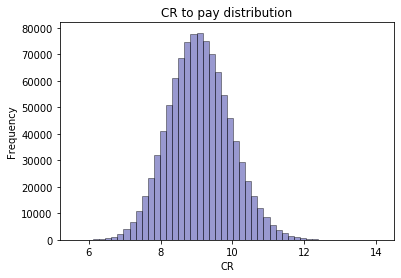

In [26]:
#Payments

#NO PRIOR DATA
#Lower limit of CR to Payment
#cr_pay_low = 0.1
#Higher limit of CR to Payment
#cr_pay_high = 0.2

#cr_pay_prob = uniform.rvs(cr_pay_low, cr_pay_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CR to Payments is 9%, interval is from 6% to 12%
cr_pay_prob = np.random.beta(100, 1000, size=volume)

cr_pay_prob_percent = cr_pay_prob * 100
cr_pay_distr = sns.distplot(cr_pay_prob_percent,
                            kde = False, 
                            color = 'darkblue', 
                            hist_kws={'edgecolor':'black'})
plt.title('CR to pay distribution')
plt.xlabel('CR')
plt.ylabel('Frequency')
plt.show()

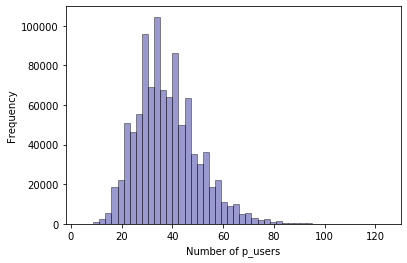

...19 p_users: 1.0% (with costs interval 340.87$ - 670.76$; Medium is 505.82$)
20 p_users: 1.2% (with costs interval 323.83$ - 637.22$; Medium is 480.52$)
21 p_users: 1.46% (with costs interval 308.41$ - 606.88$; Medium is 457.64$)
22 p_users: 1.68% (with costs interval 294.39$ - 579.29$; Medium is 436.84$)
23 p_users: 1.96% (with costs interval 281.59$ - 554.11$; Medium is 417.85$)
24 p_users: 2.22% (with costs interval 269.86$ - 531.02$; Medium is 400.44$)
25 p_users: 2.43% (with costs interval 259.06$ - 509.78$; Medium is 384.42$)
26 p_users: 2.67% (with costs interval 249.1$ - 490.17$; Medium is 369.63$)
27 p_users: 2.85% (with costs interval 239.87$ - 472.02$; Medium is 355.94$)
28 p_users: 3.06% (with costs interval 231.31$ - 455.16$; Medium is 343.23$)
29 p_users: 3.2% (with costs interval 223.33$ - 439.46$; Medium is 331.4$)
30 p_users: 3.33% (with costs interval 215.89$ - 424.81$; Medium is 320.35$)
31 p_users: 3.44% (with costs interval 208.92$ - 411.11$; Medium is 310.02$)
3

In [21]:
#payments
#remember, you can bootstrap it
p_users = binom.rvs(r_users, cr_pay_prob)
p_users_distr = sns.distplot(p_users,
                             kde = False, 
                             color = 'darkblue', 
                             hist_kws={'edgecolor':'black'} )
#use it, if number of p_users is really low - 0, 1, 2, 3 on x-label
#plt.xticks(range(np.min(p_users), np.max(p_users) + 1))
plt.ylabel('Frequency')
plt.xlabel('Number of p_users')
plt.show()

p_users_list = p_users.tolist()
p_users_count = set(p_users_list)
for i in p_users_count:
    elements_count = p_users_list.count(i)
    probability = float(elements_count)/float(len(p_users_list))
    if i != 0:
        if i == 1:
            print('Maximum CAC with 95$ probability is ' + str(round((visitors_costs_median + visitors_costs_std)/i, 2))
                  + '$')
            print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$' 
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
        else:
            print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$'
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
    else:
        print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%')